# Principal Component Analysis (PCA)

## Introduction

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional form while retaining as much variance as possible. PCA is widely used in exploratory data analysis and for making predictive models more efficient and less prone to overfitting.

### Key Concepts

1. **Variance**: Measure of how much the data is spread out.
2. **Principal Components**: New features obtained by linear transformation of the original features.
3. **Dimensionality Reduction**: Reducing the number of features while retaining significant variance.

## Preparation

Before applying PCA, we need to prepare our data. We'll use a hypothetical real estate dataset for this example.



# Importing Libraries


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Loading and Exploring the Data
We'll use the Boston housing dataset as a proxy for real estate data.

In [4]:
# Load the dataset
housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

# Display the first few rows of the dataset
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Step 1: Data Preprocessing
Standardize the data to bring all features to the same scale.

In [5]:
# Separate features and target
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Step 2: Applying PCA
Fit PCA to the standardized data and transform it to the principal components.

In [6]:
# Initialize and fit PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['PRICE'] = y

# Display the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.25336868 0.23516245]


In [9]:
df_pca

,PC1,PC2,PRICE
0,1.882704,-0.503362,4.526
1,1.371120,-0.121406,3.585
2,2.086868,-0.501136,3.521
3,1.575801,-1.239495,3.413
4,1.591206,-1.345264,3.422
...,...,...,...
20635,1.386779,-1.296137,0.781
20636,1.875219,-0.671533,0.771
20637,1.402357,-1.096426,0.923
20638,1.542943,-1.059408,0.847


# Step 3: Visualizing PCA Results
Visualize the data in the new principal component space.

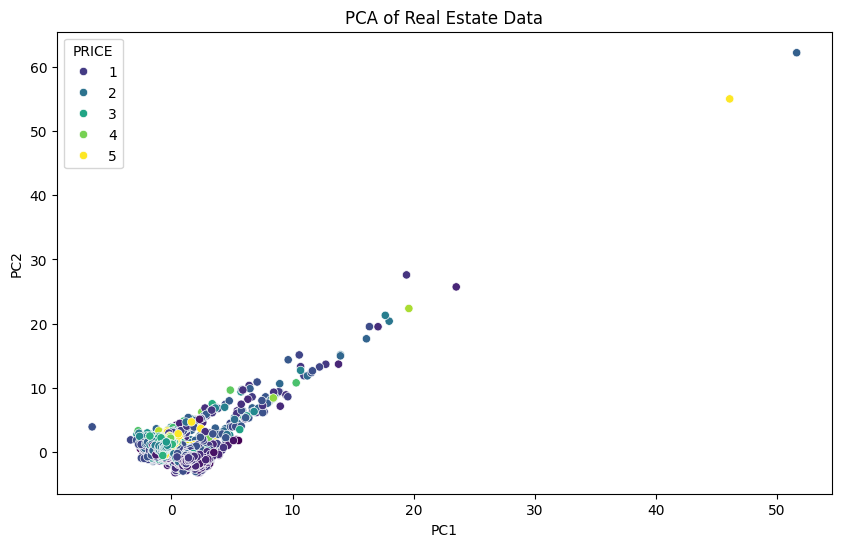

In [7]:
# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='PRICE', data=df_pca, palette='viridis')
plt.title('PCA of Real Estate Data')
plt.show()


# Step 4: PCA for Model Implementation
Use PCA to transform the data and then apply a regression model.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Squared Error: 1.2931512026974519
R-squared: 0.01316976289846139


# Conclusion
PCA is a powerful technique for dimensionality reduction, making data analysis and modeling more efficient. In this project, we used PCA to transform real estate data into a lower-dimensional form, visualized the principal components, and implemented a linear regression model.